# Introduction

## Business Question

---

> **Guiding question:** What are the top 3 zip codes for short-term investment (based on ROI) and the worst 3 (based on risk) in the city of Pittsburgh, PA?
>
>
> **Evaluation Metric:** ROI/Risk
>
>
> **Dataset:** Zillow data from 1996-2018
>
>
> **Goal:** Determine ROI and risk via time series forecasting 
>
>
> 

---

# Imports

In [194]:
## Data Handling
import pandas as pd
import numpy as np

## Visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Time Series Modeling
import statsmodels
import statsmodels.tsa.api as tsa
from statsmodels.tsa.seasonal import seasonal_decompose

import pmdarima as pmd
from pmdarima.arima import ndiffs
from pmdarima.arima import nsdiffs

## Custom-made Functions
from bmc_functions import eda
from bmc_functions import time_series_modeling as tsm

## Settings
%matplotlib inline
plt.style.use('seaborn-talk')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
pd.set_option('max_rows', 100)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reading Data

In [195]:
## Reading data
source = '../data/zillow_data.csv'
data = pd.read_csv(source)
data

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,"334,200.00","335,400.00","336,500.00","337,600.00","338,500.00","339,500.00","340,400.00","341,300.00","342,600.00","344,400.00","345,700.00","346,700.00","347,800.00","349,000.00","350,400.00","352,000.00","353,900.00","356,200.00","358,800.00","361,800.00","365,700.00","370,200.00","374,700.00","378,900.00","383,500.00","388,300.00","393,300.00","398,500.00","403,800.00","409,100.00","414,600.00","420,100.00","426,200.00","432,600.00","438,600.00","444,200.00","450,000.00","455,900.00","462,100.00","468,500.00","475,300.00","482,500.00","490,200.00","498,200.00","507,200.00","516,800.00","526,300.00","535,300.00","544,500.00","553,500.00","562,400.00","571,200.00","579,800.00","588,100.00","596,300.00","604,200.00","612,200.00","620,200.00","627,700.00","634,500.00","641,000.00","647,000.00","652,700.00","658,100.00","663,300.00","668,400.00","673,400.00","678,300.00","683,200.00","688,300.00","693,300.00","698,000.00","702,400.00","706,400.00","710,200.00","714,000.00","717,800.00","721,700.00","725,700.00","729,900.00","733,400.00","735,600.00","737,200.00","739,000.00","740,900.00","742,700.00","744,400.00","746,000.00","747,200.00","748,000.00","749,000.00","750,200.00","752,300.00","755,300.00","759,200.00","764,000.00","769,600.00","775,600.00","781,900.00","787,900.00","793,200.00","798,200.00","803,100.00","807,900.00","812,900.00","818,100.00","823,100.00","828,300.00","834,100.00","839,800.00","845,600.00","851,800.00","858,000.00","864,400.00","870,700.00","876,200.00","880,700.00","884,400.00","887,600.00","890,500.00","893,300.00","895,500.00","897,300.00","899,000.00","900,400.00","902,000.00","904,400.00","907,100.00","909,700.00","911,900.00","913,000.00","913,000.00","912,000.00","909,300.00","905,300.00","901,400.00","897,900.00","

In [196]:
## Initial inspection
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


## Creating Subset of Zipcodes

---

> The dataset is much larger than I need for my purposes, so I will select only the zip codes for the Pittsburgh Metro area.
>
>
> To select this data, I will filter the initial dataframe by selecting "Pittsburgh" from the "city" column.

---

In [197]:
## Selecting the city of Pittsburgh 
pitt_df = data[data['City'] == 'Pittsburgh']
pitt_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
1928,63937,15206,Pittsburgh,PA,Pittsburgh,Allegheny,1929,"50,200.00","50,300.00","50,300.00","50,300.00","50,300.00","50,400.00","50,400.00","50,400.00","50,500.00","50,500.00","50,600.00","50,500.00","50,500.00","50,500.00","50,400.00","50,400.00","50,400.00","50,300.00","50,400.00","50,400.00","50,500.00","50,700.00","50,900.00","51,200.00","51,400.00","51,800.00","52,200.00","52,600.00","53,100.00","53,700.00","54,100.00","54,600.00","55,000.00","55,400.00","55,600.00","55,700.00","55,600.00","55,500.00","55,300.00","55,000.00","54,700.00","54,300.00","54,000.00","53,800.00","53,700.00","53,600.00","53,700.00","53,700.00","54,000.00","54,300.00","54,800.00","55,300.00","55,900.00","56,500.00","57,200.00","58,000.00","58,800.00","59,500.00","60,100.00","60,600.00","61,100.00","61,500.00","61,900.00","62,300.00","62,600.00","63,000.00","63,300.00","63,700.00","64,000.00","64,300.00","64,400.00","64,500.00","64,600.00","64,500.00","64,500.00","64,300.00","64,200.00","64,200.00","64,200.00","64,100.00","64,000.00","64,200.00","64,800.00","65,400.00","66,000.00","66,600.00","67,300.00","67,900.00","68,600.00","69,200.00","69,600.00","69,900.00","70,300.00","70,900.00","71,500.00","72,200.00","72,900.00","73,600.00","74,300.00","74,900.00","75,400.00","75,900.00","76,300.00","76,700.00","76,800.00","76,600.00","76,100.00","75,500.00","74,900.00","74,400.00","74,100.00","73,900.00","73,800.00","73,600.00","73,500.00","73,600.00","73,900.00","74,300.00","75,000.00","75,700.00","76,500.00","77,200.00","77,800.00","78,400.00","79,000.00","79,600.00","80,200.00","80,600.00","80,700.00","80,500.00","80,100.00","79,600.00","79,200.00","78,700.00","78,300.00","78,000.00","77,800.00","77,700.00","77,900.00","78,300.00","78,800.00","79,400.00","80,300.00","81,500.00","82,900.00","84,400.00","86,100.00","

In [198]:
## Examining statistics for the new dataframe
eda.report_df(pitt_df).T

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,City,CountyName,Metro,RegionID,RegionName,SizeRank,State
null_sum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null_pct,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

# Data Cleaning and Prep

---

> The dataset currently contains monthly sale price data as columns for each zip code. In order to be able to use the sale pricing, I will use a custom function provided as part of this project to convert the year/month column label into a new single column.

---

In [199]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe with the datetime column names
    as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    
    Source: https://github.com/learn-co-curriculum/dsc-phase-4-project/blob/
    main/time-series/starter_notebook.ipynb
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank','City',
                                  'State', 'Metro', 'CountyName'],
                     var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    
    return melted

In [200]:
## Melting the dataframe to move the dates from columns to new rows per zipcode
pitt_melted = melt_data(pitt_df)
pitt_melted

,RegionName,RegionID,SizeRank,City,State,Metro,CountyName,time,value
0,15206,63937,1929,Pittsburgh,PA,Pittsburgh,Allegheny,1996-04-01,"50,200.00"
1,15212,63943,2288,Pittsburgh,PA,Pittsburgh,Allegheny,1996-04-01,"38,800.00"
2,15217,63948,2941,Pittsburgh,PA,Pittsburgh,Allegheny,1996-04-01,"105,400.00"
3,15213,63944,3326,Pittsburgh,PA,Pittsburgh,Allegheny,1996-04-01,"41,200.00"
4,15210,63941,3712,Pittsburgh,PA,Pittsburgh,Allegheny,1996-04-01,"33,400.00"
...,...,...,...,...,...,...,...,...,...
5030,15211,63942,6935,Pittsburgh,PA,Pittsburgh,Allegheny,2018-04-01,"128,400.00"
5031,15243,63974,7027,Pittsburgh,PA,Pittsburgh,Allegheny,2018-04-01,"224,800.00"
5032,15207,63938,7586,Pittsburgh,PA,Pittsburgh,Allegheny,2018-04-01,"90,100.00"
5033,15204,63935,8949,Pittsburgh,PA,Pittsburgh,Allegheny,2018-04-01,"63,000.00"


In [201]:
## Confirming conversion to "datetime" datatype
pitt_melted['time']

0      1996-04-01
1      1996-04-01
2      1996-04-01
3      1996-04-01
4      1996-04-01
          ...    
5030   2018-04-01
5031   2018-04-01
5032   2018-04-01
5033   2018-04-01
5034   2018-04-01
Name: time, Length: 5035, dtype: datetime64[ns]

In [202]:
## Selecting columns to keep for modeling
keep = ['RegionName', 'time', 'value']

In [203]:
## Keeping only modeling-relevant data
pitt_data = pitt_melted[keep]
pitt_data

,RegionName,time,value
0,15206,1996-04-01,"50,200.00"
1,15212,1996-04-01,"38,800.00"
2,15217,1996-04-01,"105,400.00"
3,15213,1996-04-01,"41,200.00"
4,15210,1996-04-01,"33,400.00"
...,...,...,...
5030,15211,2018-04-01,"128,400.00"
5031,15243,2018-04-01,"224,800.00"
5032,15207,2018-04-01,"90,100.00"
5033,15204,2018-04-01,"63,000.00"


In [204]:
## Setting datetime index (required for modeling)
pitt_data.set_index('time', inplace=True)
pitt_data

,RegionName,value
time,,
1996-04-01,15206,"50,200.00"
1996-04-01,15212,"38,800.00"
1996-04-01,15217,"105,400.00"
1996-04-01,15213,"41,200.00"
1996-04-01,15210,"33,400.00"
...,...,...
2018-04-01,15211,"128,400.00"
2018-04-01,15243,"224,800.00"
2018-04-01,15207,"90,100.00"


---

> *The following code is adapted from code within [this notebook](https://github.com/flatiron-school/Online-DS-FT-022221-Cohort-Notes/blob/master/Phase_4/topic_37_intro_to_time_series/topic_37_intro_to_time_series_crime_v3-SG.ipynb) by James Irving, Ph.D.*

---

In [205]:
## Creating list of unique zipcodes from the dataframe
zipcodes = list(pitt_data['RegionName'].unique())
zipcodes

[15206,
 15212,
 15217,
 15213,
 15210,
 15205,
 15216,
 15220,
 15228,
 15232,
 15201,
 15214,
 15226,
 15203,
 15211,
 15243,
 15207,
 15204,
 15233]

In [206]:
## Inspecting first zipcode in list - datetime index and associated sell value
test_code = zipcodes[0]
test_zipcode_series = pitt_data.groupby('RegionName')\
                                .get_group(test_code)['value']\
                                                            .rename(test_code)
test_zipcode_series

time
1996-04-01    50,200.00
1996-05-01    50,300.00
1996-06-01    50,300.00
1996-07-01    50,300.00
1996-08-01    50,300.00
                ...    
2017-12-01   174,500.00
2018-01-01   176,800.00
2018-02-01   179,600.00
2018-03-01   185,500.00
2018-04-01   191,100.00
Name: 15206, Length: 265, dtype: float64

In [207]:
## Creating a dictionary to store each zipcode and its timeseries data

zipcodes_dict = {}

for zipcode in zipcodes:
    
    ## Create the series for each zipcode
    zipcode_series = pitt_data.groupby('RegionName')\
                                                .get_group(zipcode)['value']\
                                                            .rename(zipcode)
    
    ## Save in zipcode dictionary
    zipcodes_dict[zipcode] = zipcode_series.resample('MS').asfreq()
    
## Display the keys
zipcodes_dict.keys()

dict_keys([15206, 15212, 15217, 15213, 15210, 15205, 15216, 15220, 15228, 15232, 15201, 15214, 15226, 15203, 15211, 15243, 15207, 15204, 15233])

In [208]:
## Confirming all zip codes are present in dictionary
list(zipcodes_dict.keys()) == zipcodes

True

In [209]:
## Inspecting values for one key:value pair
zipcodes_dict[15206]

time
1996-04-01    50,200.00
1996-05-01    50,300.00
1996-06-01    50,300.00
1996-07-01    50,300.00
1996-08-01    50,300.00
                ...    
2017-12-01   174,500.00
2018-01-01   176,800.00
2018-02-01   179,600.00
2018-03-01   185,500.00
2018-04-01   191,100.00
Freq: MS, Name: 15206, Length: 265, dtype: float64

In [210]:
## reviewing full dataset for Pittsburgh
zipcodes_df_full = pd.DataFrame(zipcodes_dict)
zipcodes_df_full

,15206,15212,15217,15213,15210,15205,15216,15220,15228,15232,15201,15214,15226,15203,15211,15243,15207,15204,15233
time,,,,,,,,,,,,,,,,,,,
1996-04-01,"50,200.00","38,800.00","105,400.00","41,200.00","33,400.00","69,800.00","64,000.00","85,400.00","122,900.00","146,700.00","34,400.00","55,100.00","60,600.00","38,700.00","38,600.00","113,300.00","42,800.00","44,600.00","41,000.00"
1996-05-01,"50,300.00","38,800.00","105,600.00","41,100.00","33,500.00","69,700.00","63,700.00","85,200.00","122,300.00","146,900.00","34,600.00","54,900.00","60,300.00","38,500.00","38,600.00","112,700.00","42,800.00","44,500.00","40,900.00"
1996-06-01,"50,300.00","38,900.00","105,800.00","41,000.00","33,600.00","69,500.00","63,400.00","85,000.00","121,700.00","147,000.00","34,700.00","54,700.00","60,000.00","38,200.00","38,600.00","112,200.00","42,900.00","44,500.00","40,700.00"
1996-07-01,"50,300.00","39,000.00","105,900.00","40,900.00","33,700.00","69,300.00","63,000.00","84,900.00","121,100.00","147,100.00","34,700.00","54,500.00","59,600.00","37,900.00","38,500.00","111,700.00","42,900.00","44,400.00","40,600.00"
1996-08-01,"50,300.00","39,000.00","106,000.00","40,800.00","33,800.00","69,200.00","62,700.00","84,700.00","120,600.00","147,300.00","34,800.00","54,300.00","59,200.00","37,700.00","38,500.00","111,200.00","43,000.00","44,400.00","40,400.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,"174,500.00","78,700.00","303,400.00","186,700.00","45,500.00","131,000.00","131,900.00","156,100.00","268,500.00","507,500.00","170,400.00","104,800.00","120,300.00","168,200.00","119,000.00","219,900.00","85,500.00","59,600.00","125,200.00"
2018-01-01,"176,800.00","79,700.00","304,900.00","188,000.00","45,700.00","130,500.00","132,400.00","156,700.00","268,400.00","511,700.00","171,400.00","107,200.00","120,900.00","168,100.00","120,800.00","220,300.00","85,800.00","60,200.00","126,200.00"
2018-02-01,"179,600.00","81,100.00","307,800.00","188,900.00","46,300.00","130,600.00","133,500.00","157,600.00","269,000.00","513,000.00","173,900.00","108,600.00","121,700.00","169,000.00","123,600.00","221,600.00","87,000.00","61,200.00","129,300.00"


In [211]:
## Selecting data starting from 2008 onwards
zipcodes_df = zipcodes_df_full.loc['2008':]
zipcodes_df

,15206,15212,15217,15213,15210,15205,15216,15220,15228,15232,15201,15214,15226,15203,15211,15243,15207,15204,15233
time,,,,,,,,,,,,,,,,,,,
2008-01-01,"79,400.00","58,400.00","202,300.00","88,600.00","40,200.00","96,900.00","90,800.00","123,900.00","187,600.00","314,800.00","67,100.00","78,000.00","78,000.00","105,600.00","66,100.00","166,400.00","66,500.00","57,700.00","94,000.00"
2008-02-01,"80,300.00","58,400.00","202,000.00","88,700.00","39,600.00","97,200.00","90,900.00","123,700.00","187,200.00","315,800.00","67,700.00","78,100.00","78,200.00","107,300.00","65,700.00","166,400.00","66,400.00","57,700.00","92,600.00"
2008-03-01,"81,500.00","58,100.00","201,700.00","88,700.00","39,100.00","97,500.00","91,000.00","123,400.00","186,700.00","316,600.00","68,400.00","78,000.00","78,400.00","108,700.00","65,100.00","166,400.00","66,400.00","57,700.00","91,300.00"
2008-04-01,"82,900.00","57,600.00","201,500.00","88,700.00","38,400.00","97,800.00","91,100.00","123,000.00","185,900.00","317,100.00","69,500.00","77,800.00","78,700.00","109,800.00","64,600.00","166,400.00","66,400.00","57,600.00","90,100.00"
2008-05-01,"84,400.00","57,000.00","201,800.00","88,800.00","37,900.00","98,200.00","91,100.00","122,600.00","185,000.00","316,700.00","70,500.00","77,700.00","79,000.00","110,800.00","64,400.00","166,400.00","66,600.00","57,600.00","88,200.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,"174,500.00","78,700.00","303,400.00","186,700.00","45,500.00","131,000.00","131,900.00","156,100.00","268,500.00","507,500.00","170,400.00","104,800.00","120,300.00","168,200.00","119,000.00","219,900.00","85,500.00","59,600.00","125,200.00"
2018-01-01,"176,800.00","79,700.00","304,900.00","188,000.00","45,700.00","130,500.00","132,400.00","156,700.00","268,400.00","511,700.00","171,400.00","107,200.00","120,900.00","168,100.00","120,800.00","220,300.00","85,800.00","60,200.00","126,200.00"
2018-02-01,"179,600.00","81,100.00","307,800.00","188,900.00","46,300.00","130,600.00","133,500.00","157,600.00","269,000.00","513,000.00","173,900.00","108,600.00","121,700.00","169,000.00","123,600.00","221,600.00","87,000.00","61,200.00","129,300.00"


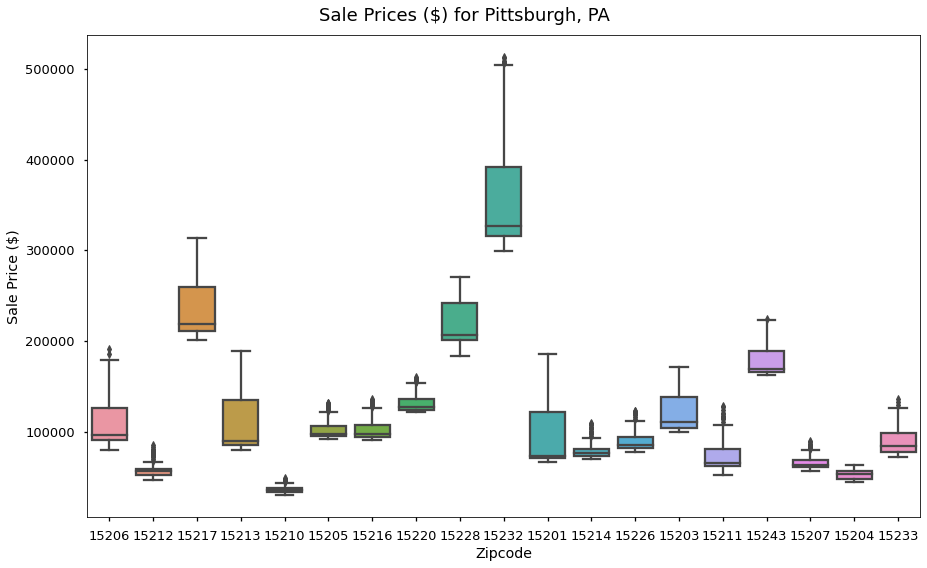

In [212]:
## Visualizing data subset
eda.plot_boxes(zipcodes_df, x_label='Zipcode', y_label='Sale Price ($)',
               suptitle='Sale Prices ($) for Pittsburgh, PA');

In [213]:
## Determining rankings of each zip code based on average sale price
zip_rankings = list(zipcodes_df.mean().sort_values().index)
zip_rankings

[15210,
 15204,
 15212,
 15207,
 15211,
 15214,
 15226,
 15233,
 15201,
 15205,
 15216,
 15213,
 15206,
 15203,
 15220,
 15243,
 15228,
 15217,
 15232]

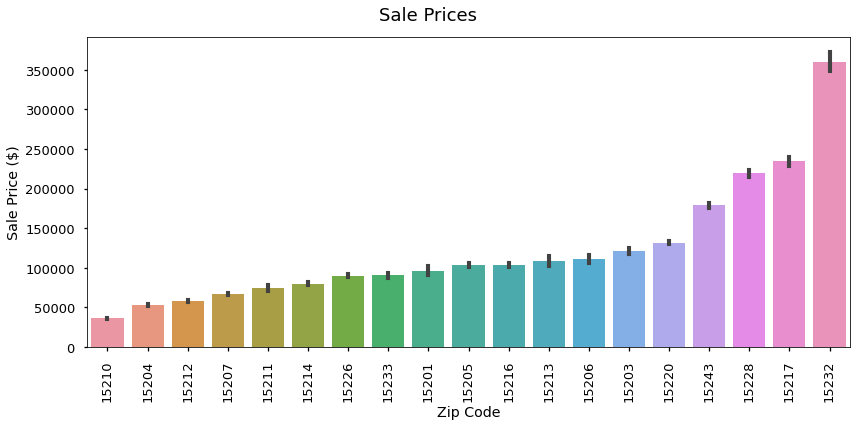

In [214]:
## Visualizing the average prices for the top three and lowest zip codes
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(data = zipcodes_df, order = zip_rankings)
ax.set_xlabel('Zip Code')
ax.set_ylabel('Sale Price ($)')
ax.tick_params(axis='x',labelrotation=90)
plt.suptitle('Sale Prices', size = 18)
plt.tight_layout();
# plt.savefig('./img/Avg_Sale_Prices.png', dpi=300)

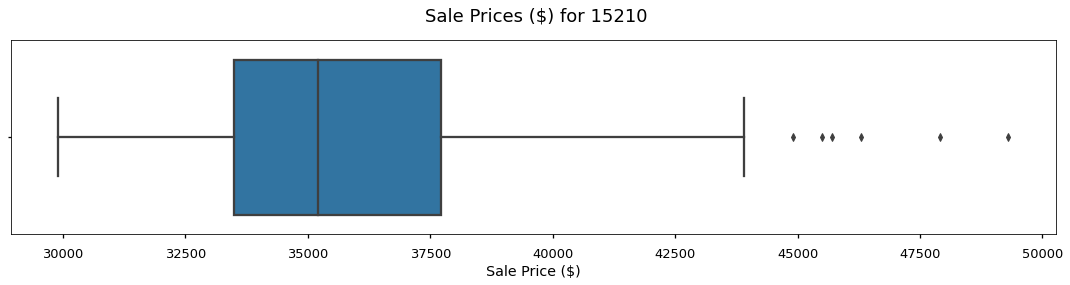

In [215]:
## Visualizing the lowest sale prices
fig, ax = plt.subplots(figsize=(15,4))
ax = sns.boxplot(data=zipcodes_df, x=15210)
ax.set_xlabel('Sale Price ($)')
plt.suptitle('Sale Prices ($) for 15210', size = 18)
plt.tight_layout();

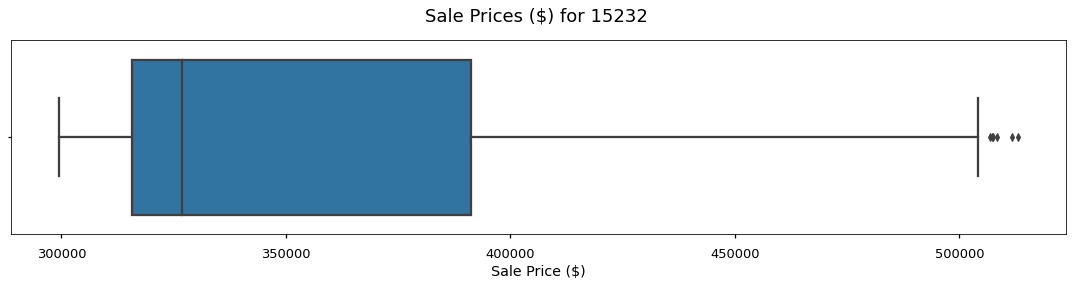

In [216]:
## Visualizing the highest sale prices
fig, ax = plt.subplots(figsize=(15,4))
ax = sns.boxplot(data=zipcodes_df, x=15232)
ax.set_xlabel('Sale Price ($)')
plt.suptitle('Sale Prices ($) for 15232', size = 18)
plt.tight_layout();

In [217]:
top_bottom_zips = zipcodes_df.loc[:, [15210,15204,15212,15228,15217,15232]]
top_bottom_zips

,15210,15204,15212,15228,15217,15232
time,,,,,,
2008-01-01,"40,200.00","57,700.00","58,400.00","187,600.00","202,300.00","314,800.00"
2008-02-01,"39,600.00","57,700.00","58,400.00","187,200.00","202,000.00","315,800.00"
2008-03-01,"39,100.00","57,700.00","58,100.00","186,700.00","201,700.00","316,600.00"
2008-04-01,"38,400.00","57,600.00","57,600.00","185,900.00","201,500.00","317,100.00"
2008-05-01,"37,900.00","57,600.00","57,000.00","185,000.00","201,800.00","316,700.00"
...,...,...,...,...,...,...
2017-12-01,"45,500.00","59,600.00","78,700.00","268,500.00","303,400.00","507,500.00"
2018-01-01,"45,700.00","60,200.00","79,700.00","268,400.00","304,900.00","511,700.00"
2018-02-01,"46,300.00","61,200.00","81,100.00","269,000.00","307,800.00","513,000.00"


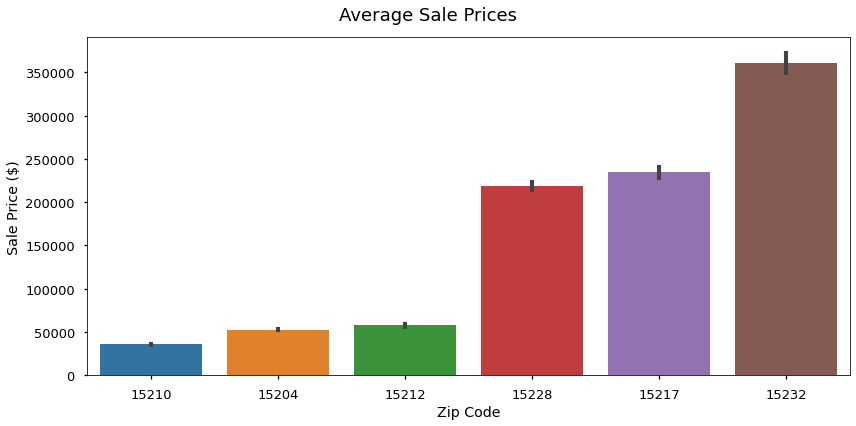

In [218]:
## Visualizing the average prices for the top three and lowest zip codes
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(data = top_bottom_zips)
ax.set_xlabel('Zip Code')
ax.set_ylabel('Sale Price ($)')
plt.suptitle('Average Sale Prices', size = 18)
plt.tight_layout();
# plt.savefig('Avg_Sale_Prices', dpi=300)

# T/T Split

In [219]:
## Testing first zipcode from dictionary
zipcode_val = zipcodes_df[15206].copy()
zipcode_val

time
2008-01-01    79,400.00
2008-02-01    80,300.00
2008-03-01    81,500.00
2008-04-01    82,900.00
2008-05-01    84,400.00
                ...    
2017-12-01   174,500.00
2018-01-01   176,800.00
2018-02-01   179,600.00
2018-03-01   185,500.00
2018-04-01   191,100.00
Freq: MS, Name: 15206, Length: 124, dtype: float64

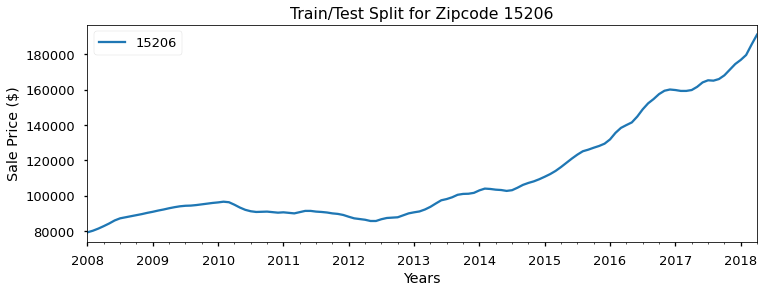

In [220]:
## Visualizing first zipcode priot to split

fig, ax = plt.subplots(figsize = (12,4))
ax = zipcode_val.plot()
ax.legend()
ax.set_xlabel('Years')
ax.set_ylabel('Sale Price ($)')
ax.set_title(f'Train/Test Split for Zipcode {zipcode_val.name}');

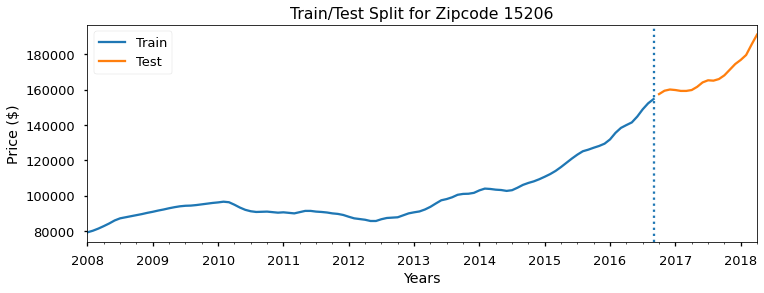

In [221]:
## Splitting Data

tts_cutoff = round(zipcode_val.shape[0]*.85)
train = zipcode_val.iloc[:tts_cutoff]
test = zipcode_val.iloc[tts_cutoff:]

## Plot
fig, ax = plt.subplots(figsize = (12,4))
ax = train.plot(label='Train')
ax = test.plot(label='Test')
ax.legend()
ax.set_xlabel('Years')
ax.set_ylabel('Price ($)')
ax.set_title(f'Train/Test Split for Zipcode {zipcode_val.name}')
ax.axvline(train.index[-1], linestyle=":");

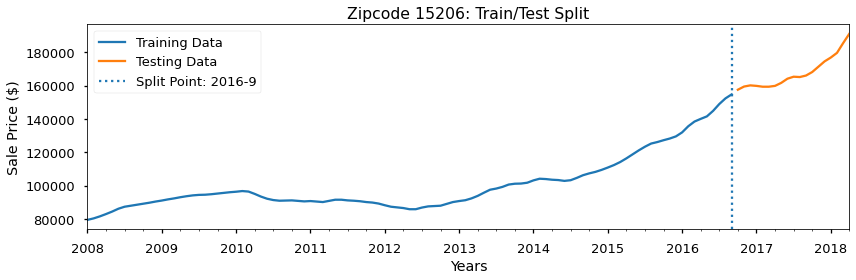

In [222]:
## Testing functionalized train/test split for reuse on other zipcodes
train, test, _,_ = tsm.ts_split(zipcode_val, show_vis=True)

In [223]:
## Inspecting training set
len(train)

105

In [224]:
## Inspecting testing set
len(test)

19

# Stationarity Check

---

> The following functions are adapted from [this notebook](https://github.com/flatiron-school/Online-DS-FT-022221-Cohort-Notes/blob/master/Phase_4/topic_37_intro_to_time_series/topic_37_intro_to_time_series_crime_v3-SG.ipynb) by James Irving, Ph.D.

---

## Dickey Fuller Test

In [225]:
## Performing Dickey-Fuller Test
zipdf_results = tsa.stattools.adfuller(train)
zipdf_results

(2.0709935061877904,
 0.9987583894364246,
 3,
 101,
 {'1%': -3.4968181663902103,
  '5%': -2.8906107514600103,
  '10%': -2.5822770483285953},
 1370.270091934341)

In [226]:
## Creating a dictionary to store initial results
index_label =[f'{train.name}']
labels = ['Test Stat','P-Value','Number of Lags Used','Number of Obs. Used',
        'Critical Thresholds', 'AIC Value']
results_dict  = dict(zip(labels,zipdf_results))

## Saving results to a dictionary and adding T/F for whether exceeds standard
## p-value of .05 and if we fail to reject the null hypothesis or not.
results_dict['p < .05'] = results_dict['P-Value']<.05
results_dict['Stationary'] = results_dict['p < .05']

## Creating DataFrame from dictionary
if isinstance(index_label,str):
    index_label = [index_label]
results_dict = pd.DataFrame(results_dict,index=index_label)
results_dict = results_dict[['Test Stat','P-Value','Number of Lags Used',
                             'Number of Obs. Used','P-Value','p < .05',
                             'Stationary']]

results_dict

,Test Stat,P-Value,Number of Lags Used,Number of Obs. Used,P-Value,p < .05,Stationary
15206,2.07,1.00,3,101,1.00,False,False


In [227]:
## Testing functionality
tsm.adf_test(train)

,Test Stat,P-Value,Number of Lags Used,Number of Obs. Used,P-Value,p < 0.05,Stationary
Results: 15206,2.07,1.00,3,101,1.00,False,False


## Removing Trends, Seasonality

| --- Zipcode 15206 --- | 

time
2008-02-01     900.00
2008-03-01   1,200.00
2008-04-01   1,400.00
2008-05-01   1,500.00
2008-06-01   1,700.00
               ...   
2016-05-01   1,500.00
2016-06-01   3,300.00
2016-07-01   4,100.00
2016-08-01   3,400.00
2016-09-01   2,400.00
Freq: MS, Name: 15206, Length: 104, dtype: float64


 | -------------------- ADF Results for Zipcode 15206 ------------------------------ |


,Test Stat,P-Value,Number of Lags Used,Number of Obs. Used,P-Value,p < 0.05,Stationary
Results: 15206,-1.16,0.69,2,101,0.69,False,False




 | ---------------------------- Visualizing Difference Shift --------------------- |


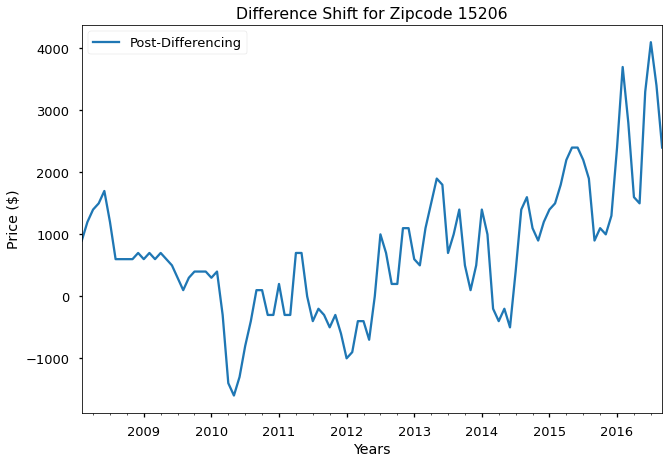

In [228]:
## Testing differenced data
tz_diff = train.diff().dropna()
print("|","---",f"Zipcode {train.name}","---","|","\n")
print(tz_diff)
print('\n\n',"|","----"*5,f"ADF Results for Zipcode {train.name}","-----"*6,"|")
display(tsm.adf_test(tz_diff))

print('\n\n','|',"----"*7,f"Visualizing Difference Shift","---"*7,"|")
fig, ax = plt.subplots()
ax = tz_diff.plot(label='Post-Differencing')
ax.legend()
ax.set_xlabel('Years')
ax.set_ylabel('Price ($)')
ax.set_title(f'Difference Shift for Zipcode {train.name}');

| --------------------- Diff Effect on Zipcode 15206 ------------------------------ | 


| --- Zipcode 15206 --- | 

time
2008-02-01     900.00
2008-03-01   1,200.00
2008-04-01   1,400.00
2008-05-01   1,500.00
2008-06-01   1,700.00
               ...   
2016-05-01   1,500.00
2016-06-01   3,300.00
2016-07-01   4,100.00
2016-08-01   3,400.00
2016-09-01   2,400.00
Freq: MS, Name: 15206, Length: 104, dtype: float64


 | -------------------- ADF Results for Zipcode 15206 ------------------------------ |


,Test Stat,P-Value,Number of Lags Used,Number of Obs. Used,P-Value,p < 0.05,Stationary
Results: 15206,-1.16,0.69,2,101,0.69,False,False




 | ------------------------ Visualizing Diff Effect -------------------------------- |


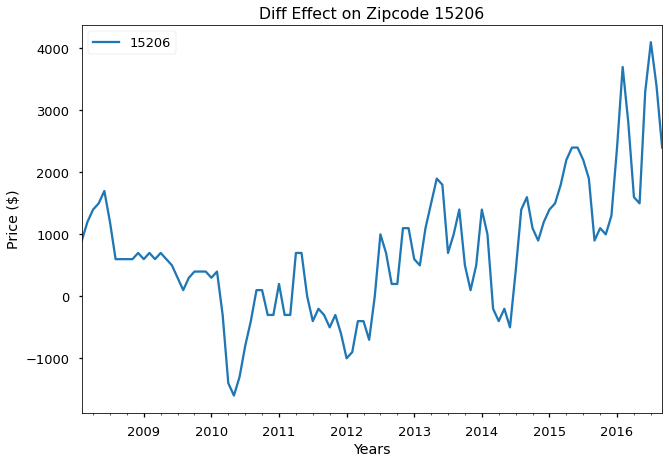

In [229]:
diff_results = tsm.remove_trends(train, "diff")

| --------------------- Log Effect on Zipcode 15206 ------------------------------ | 


| --- Zipcode 15206 --- | 

time
2008-01-01   11.28
2008-02-01   11.29
2008-03-01   11.31
2008-04-01   11.33
2008-05-01   11.34
              ... 
2016-05-01   11.86
2016-06-01   11.88
2016-07-01   11.91
2016-08-01   11.93
2016-09-01   11.95
Freq: MS, Name: 15206, Length: 105, dtype: float64


 | -------------------- ADF Results for Zipcode 15206 ------------------------------ |


,Test Stat,P-Value,Number of Lags Used,Number of Obs. Used,P-Value,p < 0.05,Stationary
Results: 15206,1.84,1.00,4,100,1.00,False,False




 | ------------------------ Visualizing Log Effect -------------------------------- |


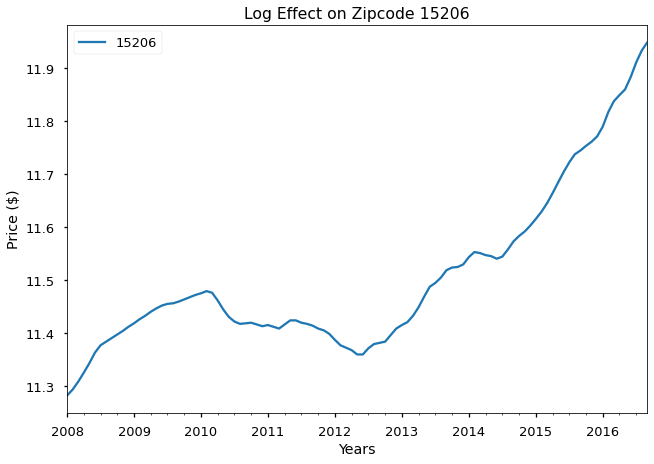

In [230]:
log_results = tsm.remove_trends(train, "log")

| --------------------- Rolling Mean Effect on Zipcode 15206 ------------------------------ | 


| --- Zipcode 15206 --- | 

time
2008-04-01   1,875.00
2008-05-01   2,125.00
2008-06-01   2,375.00
2008-07-01   2,125.00
2008-08-01   1,475.00
               ...   
2016-05-01   2,625.00
2016-06-01   3,625.00
2016-07-01   5,100.00
2016-08-01   5,425.00
2016-09-01   4,525.00
Freq: MS, Name: 15206, Length: 102, dtype: float64


 | -------------------- ADF Results for Zipcode 15206 ------------------------------ |


,Test Stat,P-Value,Number of Lags Used,Number of Obs. Used,P-Value,p < 0.05,Stationary
Results: 15206,-0.81,0.82,6,95,0.82,False,False




 | ------------------------ Visualizing Rolling Mean Effect -------------------------------- |


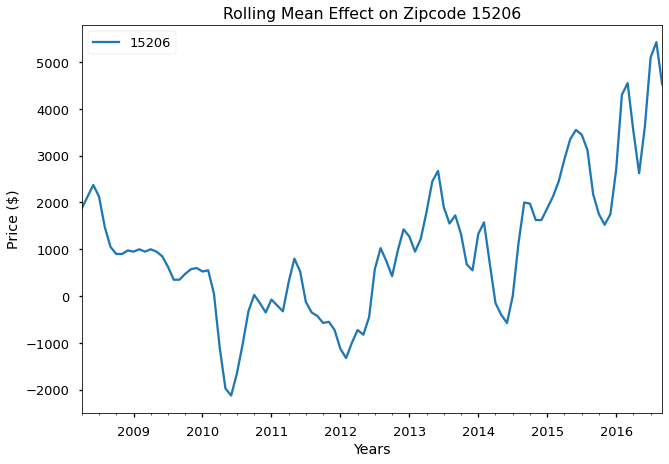

In [231]:
rolling_results = tsm.remove_trends(train, "rolling mean")

| --------------------- Ewm Effect on Zipcode 15206 ------------------------------ | 


| --- Zipcode 15206 --- | 

time
2008-01-01        0.00
2008-02-01      400.00
2008-03-01      944.26
2008-04-01    1,550.14
2008-05-01    2,142.79
                ...   
2016-05-01    7,817.79
2016-06-01    8,894.23
2016-07-01   10,395.39
2016-08-01   11,036.31
2016-09-01   10,749.05
Freq: MS, Name: 15206, Length: 105, dtype: float64


 | -------------------- ADF Results for Zipcode 15206 ------------------------------ |


,Test Stat,P-Value,Number of Lags Used,Number of Obs. Used,P-Value,p < 0.05,Stationary
Results: 15206,-0.42,0.91,3,101,0.91,False,False




 | ------------------------ Visualizing Ewm Effect -------------------------------- |


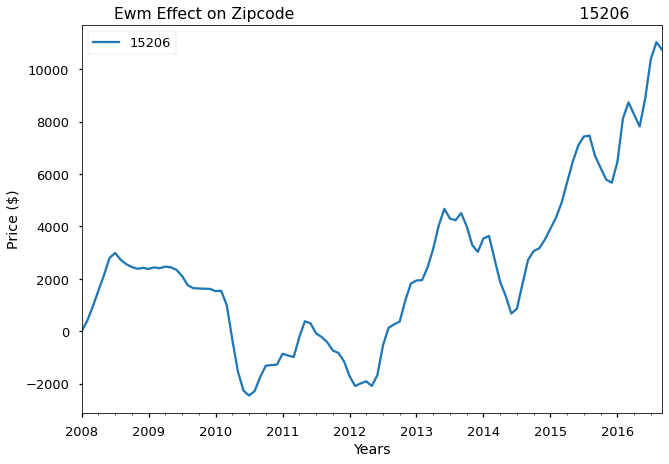

In [232]:
ewm_results = tsm.remove_trends(train, "EWM")

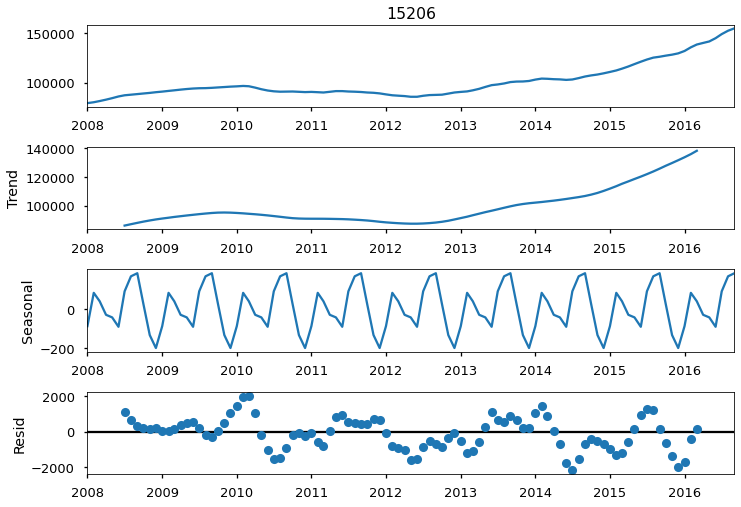

In [233]:
## Seasonal Decomposition
decomp = seasonal_decompose(train)
decomp.plot();

In [234]:
## Creating Dataframe with seasonality test results

test_results = []
test_results.append(tsm.adf_test(train))

decomp_dict = {"trend": decomp.trend,'seasonal': decomp.seasonal,
               'residuals': decomp.resid}
 
for trend, results in decomp_dict.items():

    results = results.fillna(0)
    res = tsm.adf_test(results)
    test_results.append(res)

## make into a df
seasonality_df = pd.concat(test_results)
seasonality_df

,Test Stat,P-Value,Number of Lags Used,Number of Obs. Used,P-Value,p < 0.05,Stationary
Results: 15206,2.07,1.00,3,101,1.00,False,False
Results: trend,-2.54,0.11,0,104,0.11,False,False
Results: seasonal,"-720,053,900,190,157.50",0.00,13,91,0.00,True,True
Results: resid,-3.69,0.00,4,100,0.00,True,True


# ACF/PACF Check

In [ ]:
tsm.plot_acf_pacf(train, suptitle='ACF/PACF for Training Data');

# SARIMA Modeling and Forecasting

## Auto-ARIMA

In [ ]:
# ## Using pmdarima's functions to pre-determine the best values for 
# ## differencing prior to running auto_arima

# n_d = ndiffs(train)
# n_d

# n_D = nsdiffs(train, m=12)
# n_D

In [ ]:
# ## Using auto_arima to determine best parameters for modeling
# auto_model = pmd.auto_arima(train,start_p=0,start_q=0,d=n_d,
#                             max_p=3,max_q=3,
#                             max_P=3,max_Q=3, D=n_D,
#                             start_P=0,start_Q=0,
#                             m=12,
#                             verbose=2)

# display(auto_model.summary())
# auto_model.plot_diagnostics(figsize= (12,9));
# plt.tight_layout()

## Fit Best Model

In [ ]:
# best_model = tsa.SARIMAX(train,order=auto_model.order,
#                          seasonal_order = auto_model.seasonal_order,
#                          enforce_invertibility=False).fit()

# ## Display Summary + Diagnostics
# display(best_model.summary())
# best_model.plot_diagnostics(figsize=(12,9));
# plt.tight_layout()

In [ ]:
# ## Using get_forecast to generate forecasted data
# forecast = best_model.get_forecast(steps=len(test))

# ## Saving confidence intervals and predicted mean for future
# forecast_df = forecast.conf_int()
# forecast_df.columns = ['Lower CI','Upper CI']
# forecast_df['Forecast'] = forecast.predicted_mean
# forecast_df.head(5)

In [ ]:
# ## Plotting training, test data and forecasted results
# fig,ax = plt.subplots(figsize=(13,6))

# last_n_lags=12*5         

# train.iloc[-last_n_lags:].plot(label='Training Data')
# test.plot(label='Test Data')

# ## Plotting forecasted data and confidence intervals
# forecast_df['Forecast'].plot(ax=ax,label='Forecast')
# ax.fill_between(forecast_df.index,forecast_df['Lower CI'],
#                 forecast_df['Upper CI'],color='b',alpha=0.4)

# ax.set(xlabel='Time')
# ax.set(ylabel='Sell Price ($)')
# ax.set_title('Data and Forecasted Data')
# ax.legend();

In [ ]:
# fig, ax = tsm.plot_forecast_ttf(train=train, test=test,
#                                 forecast_df = forecast_df, n_yrs_past=5)

## Forecasting

---

> Save `conf_int`, `predicted_mean` - 4cDF
>
>
> Plot Tr, Te, 4cDF

---

In [ ]:
# best_model = tsa.SARIMAX(zipcode_val,order=auto_model.order,
#                          seasonal_order = auto_model.seasonal_order,
#                          enforce_invertibility=False).fit()

# display(best_model.summary())
# best_model.plot_diagnostics(figsize=(12,9));
# plt.tight_layout()

In [ ]:
# auto_model_best, best_model_overall = tsm.create_best_model(zipcode_val, m=12)

In [ ]:
# ## Using get_forecast to generate forecasted data
# forecast = best_model.get_forecast(steps=24)

# ## Saving confidence intervals and predicted mean for future
# forecast_df = forecast.conf_int()
# forecast_df.columns = ['Lower CI','Upper CI']
# forecast_df['Forecast'] = forecast.predicted_mean
# forecast_df.head(5)

In [ ]:
# ## Plotting training, test data and forecasted results
# fig,ax = plt.subplots(figsize=(13,6))

# zipcode_val.plot(label='Training Data')

# ## Plotting forecasted data and confidence intervals
# forecast_df['Forecast'].plot(ax=ax,label='Forecast')
# ax.fill_between(forecast_df.index,forecast_df['Lower CI'],
#                 forecast_df['Upper CI'],color='b',alpha=0.4)

# ax.set(xlabel='Time')
# ax.set(ylabel='Sale Price ($)')
# ax.set_title('Data and Forecasted Data')
# ax.legend();

In [ ]:
# forecast_overall = tsm.forecast_and_ci(best_model_overall, n_yrs_future = 2)
# forecast_overall

In [ ]:
# fig, ax = tsm.plot_forecast_final(zipcode_val, forecast_overall)
# fig

In [ ]:
# investment_cost = forecast_df.iloc[0,2]
# investment_cost

In [ ]:
# roi_df = (forecast_df - investment_cost)/investment_cost*100
# roi_df

In [ ]:
# roi_final = roi_df.iloc[-1]
# roi_final.name = zipcode_val.name.astype('str')
# roi_final

In [ ]:
# pd.DataFrame(roi_final)

In [ ]:
_, roi_df, _, _, _, _, _, _, _, _ = tsm.ts_modeling_workflow(zipcodes_df, 15206, threshold=.85)
roi_df.iloc[0]

# Interpreting Results

---

> Based on my model, the ROI for the zipcode 15206 would be an average of 65.48%. However, the results may fall anywhere between 19.05% - 111.91%.

---

# Functionalizing Workflow

In [ ]:
## Testing full workflow function

fcst_full, roi_df, split_vis, fcst_len, sum_train, diag_train,sum_full,\
    diag_full, training_frcst,final_frcst = tsm.ts_modeling_workflow\
            (dataframe = zipcodes_df, zipcode = 15206, m=12, show_vis = True);

# Processing Remaining Zip Codes

---

> Now I will process the remaining zip codes via a for loop to process them through the work flow. As part of the work flow, I will review each model's performance visualizations to ensure it is appropriate for forecasting.
>
>
>I will save the results to the overall dictionary for my final review and interpretation.

---

> ***Special Note:*** Before looping through the entirety of the zip codes, I remove the zip code "15210" and process it separately.
>
>
> This is due to significant delays in running the loop (increasing loop runtime from 1.5 min to upwards of 10 minutes). The issue stems from errors during the modeling process when using the default train/test split threshold of .85.
>
>
> To resolve the issue, I run the zip code through the same process as the loop and save the results to the overall dictionary.

---

In [ ]:
## Separating the 15210 zipcode to prevent runtime delays
shorter_list = list(zipcodes_df.columns)
shorter_list.remove(15210)

In [ ]:
## Creating dictionary and storing all zipcodes and results
overall_results = {}

for i, zipcode in enumerate(shorter_list):
    
    print('|',"---"*10,f'Zipcode {zipcode}',"---"*10,'|\n')
    print(f'--> Zipcode {i+1} of {len(shorter_list)}')
    
    ## Create temporary dictionaries
    zip_tsa_results = {}
    metrics = {}
    forecast_vis = {}
    
    ## Use functionalized workflow to obtain results
    forecast_full, roi_df, split_vis, forecast_length, summary_train,\
        diag_train, summary_full, diag_full, training_frcst,final_frcst =\
        tsm.ts_modeling_workflow(dataframe = zipcodes_df, threshold = .85,
                                 zipcode = zipcode, m=12, show_vis = True,
                                 figsize=(12,4))
    
    ## Save results to temporary dictionaries
    metrics['train'] = [summary_train, diag_train]
    metrics['full'] = [summary_full, diag_full]
    
    forecast_vis['train'] = training_frcst
    forecast_vis['full'] = final_frcst
    forecast_vis['split'] = split_vis
    
    zip_tsa_results['num_yrs_forecast'] = forecast_length
    zip_tsa_results['forecasted_prices'] = forecast_full
    zip_tsa_results['roi'] = roi_df
    zip_tsa_results['model_metrics'] = metrics
    zip_tsa_results['model_visuals'] = forecast_vis
    
    ## Save final temporary dictionary to overall dictionary
    overall_results[zipcode] = zip_tsa_results
    
    print(f'--> Zipcode {i+1} of {len(shorter_list)}')
    print('|',"---"*5,f'Completed: {zipcode}',"---"*5,'|\n\n')

In [ ]:
## Processing zipcode 15210 separately
overall_results[15210] = tsm.make_dict(zipcodes_df, 15210, .8)

# Inspecting Dictionary Results

In [ ]:
overall_results[15206].keys()

In [ ]:
## Inspecting "forecasted prices" key
overall_results[15206]['forecasted_prices']

In [ ]:
## Inspecting "roi" key
overall_results[15206]['roi']

In [ ]:
## Reviewing training model metrics
display(overall_results[15206]['model_metrics']['train'][0])
display(overall_results[15206]['model_metrics']['train'][1])

In [ ]:
## Reviewing model forecasts
display(overall_results[15206]['model_visuals']['split'])
display(overall_results[15206]['model_visuals']['train'])
display(overall_results[15206]['model_visuals']['full'])

## Diagnosing Zip Code Forecasts

---

> After generating the forecast results for all of the zip codes, I reviewed the validation results for each zip code.
>
>
> Certain zip codes showed the actual sale price trend lines getting too close to the upper/lower confidence intervals. Several models missed the trends entirely, resulting in the actual data exceeding the confidence interval.
>
>
> **I will readjust the train/test threshold for the selected zip codes to address these issues.**

---

## Creating Groups for Adjustments

In [ ]:
## Adding .025 to threshold
thresh_a025 = [15217,15213,15216]

## Subtracting .05 from threshold
thresh_s05 = [15243]

## Subtracting .075 from threshold
thresh_s075 = [15210, 15207, 15204]

## Review - `'thresh_a025'`

In [ ]:
## Inspecting split and validation visuals for missed trends

for code in thresh_a025:
    print("\n|","--"*24,f"Visualizations for {code}","--"*24,"|\n")
    display(overall_results[code]['model_visuals']['split'])
    display(overall_results[code]['model_visuals']['train'])

### Interpretation - `'thresh_a025'`

---

> For these zip codes, I see that the train/test split threshold slightly missed a trend in the data, causing the actual results to approach one of the limits of the threshold too closely.
>
>
> I will test whether **increasing the threshold slightly would capture more of the trend**, bringing my forecast data closer to the test data.

---

## Review - `'thresh_s05'`

In [ ]:
## Inspecting split and validation visuals for missed trends

for code in thresh_s05:
    print("\n|","--"*24,f"Visualizations for {code}","--"*24,"|\n")
    display(overall_results[code]['model_visuals']['split'])
    display(overall_results[code]['model_visuals']['train'])

### Interpretation - `'thresh_s05'`

---

> Similar to the prior zipcodes, these zipcodes missed the trend as well. However, it seems that the trend may be *behind* the threshold.
>
>
> I will test whether **decreasing the threshold by .05 would capture more of the trend.**

---

## Review - `'thresh_s075'`

In [ ]:
## Inspecting split and validation visuals for missed trends

for i, zipcode in enumerate(thresh_s075):
    
    print('|',"---"*10,f'Zipcode {zipcode}',"---"*10,'|\n')
    print(f'--> Zipcode {i+1} of {len(thresh_s075)}\n')
    
    ## Reviewing training model metrics
    
    print('|',"---"*5,'Model Visualizations',"---"*5,'|\n')
    display(overall_results[zipcode]['model_visuals']['split'])
    display(overall_results[zipcode]['model_visuals']['train'])

### Interpretation - `'thresh_s075'`

---

> **These zipcodes missed the trends significantly as well, with forecasts exceeding the confidence intervals.** The trends may be further behind the threshold, requiring more of a reduction in the threshold.
>
>
> I will test whether **decreasing the threshold by .075 would capture more of the trend.**

---

## Review - Zipcode `15226`

---

> During my review, I noticed there was a sharp increase in the trend line for the zip code 15226, causing my model to mis-forecast the sale prices.
>
>
> **In order to address this error, I would need to increase my threshold an additional 5%.** This decision would be problematic, however, as it would limit the scope of this, and all other forecasts, to a one-year scope.
>
>
> **Instead of limiting all of my forecasts due to this single zip code, I will leave the model results at the .85 threshold.** 
>
>
> For exploratory purposes, I will visualize the impact of the change to a .90 threshold. However, **these results will not be included in my final results.**
>
>

---

In [ ]:
## EDA modeling of the 15226 zip code at a .9 threshold for train/test split

tsm.ts_modeling_workflow(zipcodes_df, 15226,threshold = .9, show_vis = True);

### Interpretation  - Zip Code `15226`

---

> As expected, increasing the threshold did increase the accuracy of the trend for the 15226 zip code. However, this change would limit the forecasts of the other zip codes by nearly 6 months. As this is only one zipcode, I will leave it's threshold at .85 to maintain the forecasts for the others.

---

# Updating Thresholds

## Updating - `'thresh_a025'`

In [ ]:
for i, zipcode in enumerate(thresh_a025):
    
    print('|',"---"*10,f'Zipcode {zipcode}',"---"*10,'|\n')
    print(f'--> Zipcode {i+1} of {len(thresh_a025)}')
    
   
    overall_results[zipcode] = tsm.make_dict(zipcodes_df, zipcode,
                                             threshold = .875, show_vis = True)
    
    print('|',"---"*3,f'Completed: {zipcode}, {i+1} of {len(thresh_a025)}',"---"*3,'|\n\n')

### Reviewing Changes  - `thresh_a025`

---

> The slight increase to the threshold for these zipcodes brought the forecasts much closer to the test values, in most cases making them nearly the same as the test data.

---

## Updating `'thresh_s05'`

In [ ]:
for i, zipcode in enumerate(thresh_s05):
    
    print('|',"---"*10,f'Zipcode {zipcode}',"---"*10,'|\n')
    print(f'--> Zipcode {i+1} of {len(thresh_s05)}')
    
   
    overall_results[zipcode] = tsm.make_dict(zipcodes_df, zipcode,
                                             threshold = .8, show_vis = True)

    print('|',"---"*3,f'Completed: {zipcode}, {i+1} of {len(thresh_s05)}',
          "---"*3,'|\n\n')

### Reviewing Changes  - `thresh_s05`

---

> The decrease of .05 in my threshold improved my forecasts for 15243. However, it seems my forecast for 15226 could still improve.
>
>
> I will need to change the threshold again for 15226 to increase the accuracy of my forecast.

---

## Updating `'thresh_s075'`

In [ ]:
for i, zipcode in enumerate(thresh_s075):
    
    print('|',"---"*10,f'Zipcode {zipcode}',"---"*10,'|\n')
    print(f'--> Zipcode {i+1} of {len(thresh_s075)}')
    
   
    overall_results[zipcode] = tsm.make_dict(zipcodes_df, zipcode,
                                             threshold = .775, show_vis = True)
    
    print('|',"---"*3,f'Completed: {zipcode}, {i+1} of {len(thresh_s075)}',
          "---"*3,'|\n\n')

### Reviewing Changes  - `thresh_s075`

---

> The decrease of .075 in my threshold improved my forecasts for 15207, but they still have room for improvement. However, this threshold is still showing poor performance for 15210 and 15204.
>
>
> I will change the threshold again for these zip codes to see if a larger decrease would improve the accuracy further.

---

### Updating `thresh_s075` - .725

In [ ]:
## Decreasing threshold to .725

for i, zipcode in enumerate(thresh_s075):
    print('|',"---"*10,f'Zipcode {zipcode}',"---"*10,'|\n')
    print(f'--> Zipcode {i+1} of {len(thresh_s075)}')
    
   
    overall_results[zipcode] = tsm.make_dict(zipcodes_df, zipcode,
                                             threshold = .725, show_vis = True)
    
    print('|',"---"*3,f'Completed: {zipcode}, {i+1} of {len(thresh_s075)}',
          "---"*3,'|\n\n')

### Reviewing Changes v2  - `thresh_s075`

---

> Bringing the threshold down to .725 from .85 brought the zip code 15207 within its confidence interval. However, zip codes 15204 and 15210 both have unstable trend lines in the training and test data, making it hard for the model to predict accurate results.
>
>
> I will accept these results with the understanding that the forecast for zip codes 15204 and 15210 will be inaccurate.

---

# Forecast Results

---

> Now that I collected all of the results for each zip code, I will calculate and save the return on investment (ROI) values for each zip code.
>
>
> I will determine my final recommendations based on the ROI results as well as using the lower confidence interval to determine the risk of each zip code.

---

In [ ]:
## Identifying keys for each zip code
overall_results[15206].keys()

In [ ]:
## Inspecting ROI dictionary
overall_results[15206]['roi']

In [ ]:
## Calculating number of months used in each forecast
roi_len = []

for zipcode, data in overall_results.items():
    roi_len.append(len(data['roi']))
    
roi_len

In [ ]:
## Determining minimum number of months for comparisons
roi_idx = min(roi_len)
roi_idx

In [ ]:
## Confirming indexing works as expected
overall_results[15206]['roi'].iloc[roi_idx]

In [ ]:
## Collecting forecasted ROI and confidence intervals
roi_test = []

for zipcode, data in overall_results.items():
    roi_test.append(data['roi'].iloc[roi_idx-1].rename(zipcode).to_frame().T)
    
roi_df = pd.concat(roi_test)

roi_df

In [ ]:
## Sorting for zip codes with highest ROI
best_roi_df = roi_df.sort_values('Forecast', ascending=False)
best_roi_df.style.background_gradient(subset=['Forecast'],
                                  cmap='RdYlGn')\
                                    .set_caption('Zipcodes by Forecasted ROI')

In [ ]:
best_roi_df.iloc[:3]

In [ ]:
## Sorting for riskiest zipcodes
risk_df = roi_df.sort_values('Lower CI')
risk_df.style.background_gradient(subset=['Lower CI'],
                                  cmap='RdYlGn').set_caption('Zipcodes by Risk')

In [ ]:
## Saving forecast figures in notebook
import os
fig_folder = "./img/"
os.makedirs(fig_folder,exist_ok=True)

for zipcode in overall_results:
    fig = overall_results[zipcode]['model_visuals']['full']
    fig.savefig(f"{fig_folder}forecast_for_{zipcode}.png",dpi=600)

# Final Recommendations

---

> My forecasts are limited to a 16-month viewpoint (based on the size of the data used for testing purposes).

---

> I would recommend short-term buyers to **focus on the following areas:**
>  * East Liberty **(zip code 15206, ROI: 42.7%)**
>  * Lawrenceville **(15201, ROI: 38.8)**
>  * North Shore/Brighton Heights **(15212, ROI: 28.9%)**

---

> I would recommend for short-term buyers to **avoid the following areas due to high risk of losing money:**
>  * Shadyside **(15232, 39.3% risk)**
>  * Oakland/North Oakland **(15213, 34.2% risk)**
>  * Perry South/Northview Heights/Summer Hill **(15214, 27.4%)**

---

# Future Work

---

> * Comparing forecasts to actualized sales using updated data from Zillow.
> * Exploring a larger range of values for the splitting threshold.
> * Identifying and adding exogenous data to support forecasts

---